In [1]:
from call_functions import *
import plotly.express as px
import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
def get_AB(L,Nx,a):
    dx = L / Nx
    Lx = L - dx
    xspan = np.arange(0, Lx + dx, dx) 
    O = np.zeros((Nx, Nx))
    G = Matrix_A_dz(Nx, dx)
    I = np.eye(Nx)
    nobs,C = GetC(np.abs(xspan - np.pi) <= a)
    C = -np.dot(C.T, C)
    AB = np.block([[O, -I], [G, C]])
    return AB, C

def get_fAB(L,Nx,a):
    Nf = Nx // 2
    dx = L / Nx
    fO = np.zeros((2 * Nf + 1, 2 * Nf + 1))
    fI = -np.eye(2 * Nf + 1)
    fF = np.diag(np.abs(np.concatenate((np.arange(0, Nf + 1), np.arange(-Nf, 0)))))
    frequences = fftfreq(Nx, dx) * 2 * np.pi  # Assuming the previously defined fftfreq function
    fC = np.real(-((a * np.exp((-1j * np.pi) * (frequences.reshape(-1, 1) - frequences))) / np.pi) * np.sinc(a * (frequences.reshape(-1, 1) - frequences) / np.pi))
    #fC = np.real((a/np.pi) * np.exp(-1j * (frequences - frequences.reshape(-1, 1)) *np.pi) * np.sinc(a * (frequences - frequences.reshape(-1, 1))))
    fAB = np.block([[fO, fI], [fF, fC]])
    return fAB,fC


In [3]:
Nx_list = 10**np.arange(1,3.7,0.1)
Nx_list = Nx_list.astype(int) + abs(Nx_list.astype(int) % 2 - 1).astype(int)
Nx_list[19] = Nx_list[19]+2
#Nx_list[28] = Nx_list[28]+2
Nx_list
Nf_list = Nx_list // 2

### Loop if needed

In [6]:
error = np.zeros(len(Nx_list))
conv_fact = np.zeros(len(Nx_list))
fconv_fact = np.zeros(len(Nx_list))
for i,Nx in  enumerate(Nx_list):
    print('doing ',i,' over ',(len(Nx_list)-1))
    L = 2 * np.pi
    dx = L / Nx
    a = 1/2 * np.pi
    DFT = 1 / Nx * getDFT(Nx)
    iDFT = getiDFT(Nx)
    AB, C = get_AB(L,Nx,a)
    fAB, fC = get_fAB(L,Nx,a)
    frequences = fftfreq(Nx, dx) * 2 * np.pi
    error[i] = np.linalg.norm(np.real(iDFT @ fC @ DFT) - C)/np.linalg.norm(C)
    eigval_AB, eigvect_AB = np.linalg.eig(AB)
    eigval_fAB, eigvect_fAB = np.linalg.eig(fAB)
    conv_fact[i] = np.max(np.real(eigval_AB)[np.real(eigval_AB) < 0])
    fconv_fact[i] = np.max(np.real(eigval_fAB)[np.real(eigval_fAB) < 0])

doing  0  over  26


TypeError: Matrix_A_dz() missing 1 required positional argument: 'd'

In [4]:
np.save('fconv_fact_1_4_01.npy', fconv_fact)
d = np.load('fconv_fact_1_4_01.npy')
d == fconv_fact

NameError: name 'fconv_fact' is not defined

### If loop not needed

In [4]:
fconv_fact = np.load('fconv_fact_1_4_01.npy')

In [5]:
fconv_fact

array([-0.11561791, -0.10864385, -0.10335646, -0.09494836, -0.08562834,
       -0.07852713, -0.07110149, -0.05903172, -0.05127045, -0.04441472,
       -0.03825089, -0.03373431, -0.02936995, -0.02586772, -0.02271908,
       -0.01996015, -0.01757994, -0.01550871, -0.01365957, -0.01201127,
       -0.01059326, -0.00933378, -0.00821844, -0.00723569, -0.0063493 ,
       -0.00557528, -0.0049029 ])

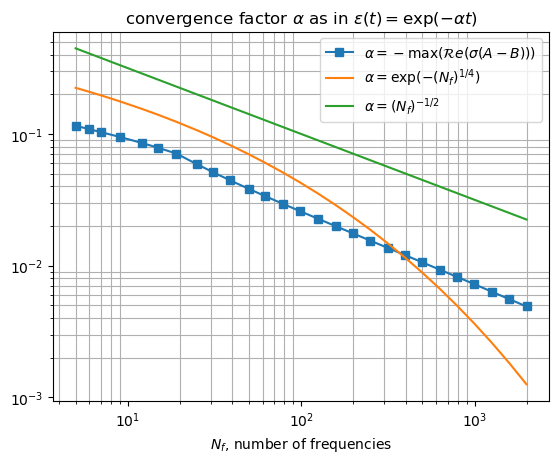

In [8]:
alpha = np.polyfit(np.log(Nf_list),np.log(-fconv_fact),1)[0]
plt.loglog(Nf_list,-fconv_fact,'-s',label=r'$\alpha = -\max(\mathcal{R}e(\sigma(A-B)))$')
plt.loglog(Nf_list,np.exp(-Nf_list**(1/4)),'-',label=r"$\alpha = \exp(-(N_f)^{1/4})$")
#plt.loglog(Nf_list,np.exp(-Nf_list**(1/3)),'--',label=r"$\alpha = \exp(-(N_f)^{1/3})$")
plt.loglog(Nf_list,(Nf_list)**(-1/2),'-',label=r'$\alpha = (N_f)^{-1/2}$')
plt.xlabel(r'$N_f$, number of frequencies')
plt.grid(which='minor')
plt.legend()
plt.title(r'convergence factor $\alpha$ as in $\varepsilon(t) = \exp(-\alpha t)$')
plt.savefig('convergence_speed.png')

tikzplotlib.save("convergence_speed.tex")